In [150]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

In [151]:
fields = ["username","date","retweets","favorites","text","geo","mentions","hashtags","id","permalink"]
volume_data = pd.read_csv("raw_data/mix/Per Period/2018_part1.csv")

B:\SCHOOL\MasterThesis\PredictorApp\venv\lib\site-packages\IPython\core\interactiveshell.py:3441: DtypeWarning: Columns (3,4,6,9,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


ValueError: time data '2018-01-01 00:00:00' does not match format '%d/%m/%Y %H:%M' (match)

In [152]:
data = volume_data
data = data.sort_values(by='date')
data = data[["date"]]

In [153]:
data = data.set_index("date")
data.index = pd.to_datetime(data.index,format='%d/%m/%Y %H:%M')

ValueError: time data '2018-01-01 00:00:00' does not match format '%d/%m/%Y %H:%M' (match)

In [ ]:
grouped_data = data.groupby(pd.Grouper(freq="60Min")).size().reset_index(name='tweet_vol')

In [ ]:
plt.close()
grouped_data.plot(x='date')
plt.show()



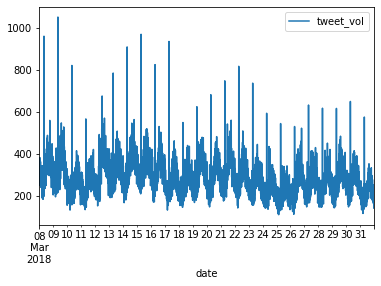

Data/2018tweets/classed\03 2018_en.csv
(958245, 13)


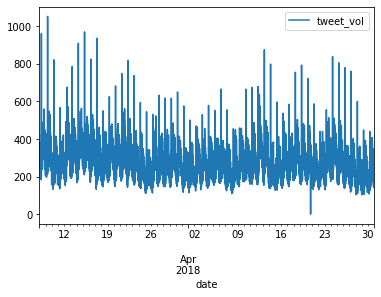

Data/2018tweets/classed\04 2018_en.csv
(2035938, 13)


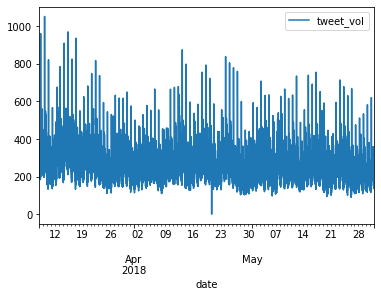

Data/2018tweets/classed\05 2018_en.csv
(3063044, 13)


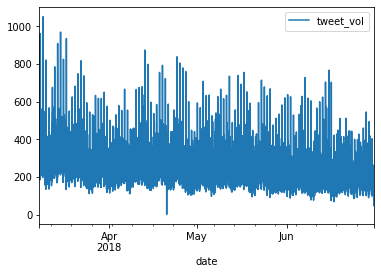

Data/2018tweets/classed\06 2018_en.csv
(3944953, 13)


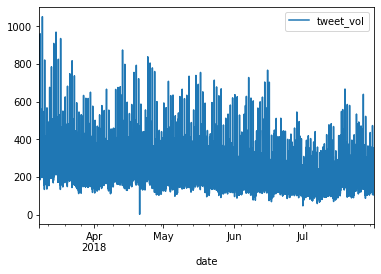

Data/2018tweets/classed\07 2018_en.csv
(4790097, 13)


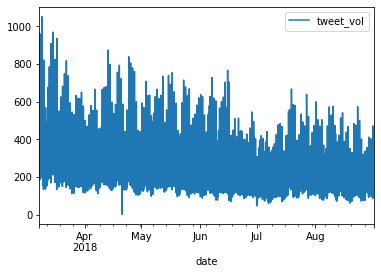

Data/2018tweets/classed\08 2018_en.csv
(5581262, 13)


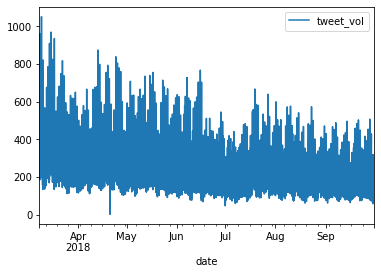

Data/2018tweets/classed\09 2018_en.csv
(6261362, 13)


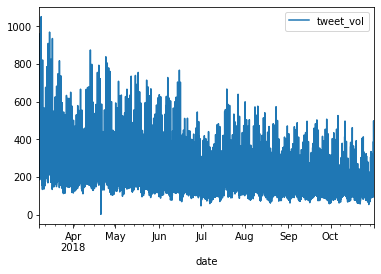

Data/2018tweets/classed\10 2018_en.csv
(6955229, 13)


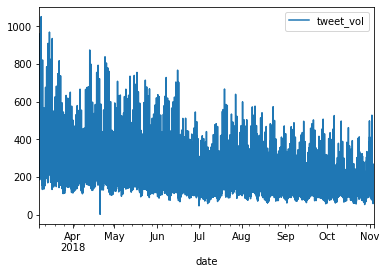

Data/2018tweets/classed\11 2018_en.csv
(7022261, 13)


In [3]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

filelist = []
root_path = "Data/2018tweets/classed"
#root_path = "raw_data/mix/Raw/19/Enero 2019"

for roots, dirs, files in os.walk(root_path):
    for file in files:
        filelist.append(os.path.join(roots, file))

for file_path in filelist:
    try:
        volume_data = pd.read_csv(file_path, sep=";")
    except:
        volume_data = pd.read_csv(file_path, lineterminator="\n")
    volume_data = volume_data.sort_values(by='date')
    volume_data['weight'] = 1
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S', utc=True)
    except:
        try:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M', utc=True)
        except:
            volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S', utc=True)
    volume_data['date'] = volume_data["date"].dt.tz_localize(None)
    volume_data = volume_data.set_index("date")

    grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
    plt.close()
    grouped_data.plot(x='date')
    plt.show()

    print(file_path)
    print(volume_data.shape)

In [ ]:
grouped_data.plot(x='date')
plt.show()


In [14]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os
start_date = datetime.datetime(2018, 2, 1, 0, 0, 0, 0, datetime.timezone.utc)
end_date = datetime.datetime(2018, 3, 1, 23, 0, 0, 0, datetime.timezone.utc)

volume_data = pd.read_csv("raw_data/TweetsBTC_16mil/peryear/18.csv", lineterminator="\n")
volume_data = volume_data.sort_values(by='date')

volume_data['date'] = pd.to_datetime(volume_data['date'])

volume_data = volume_data.loc[
        (volume_data['date'] >= start_date) &
        (volume_data['date'] <= end_date)
        ]

try:
    volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M:%S')
except:
    try:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%d/%m/%Y %H:%M')
    except:
        volume_data['date'] = pd.to_datetime(volume_data['date'], format='%Y-%m-%d %H:%M:%S')

volume_data = volume_data.set_index("date")

grouped_data = volume_data.groupby(pd.Grouper(freq="10Min")).size().reset_index(name='tweet_vol')
plt.close()
grouped_data.plot(x='date')
plt.show()


TypeError: Invalid comparison between dtype=datetime64[ns] and datetime